# GeoPandas Library Introduction

---

## Import the library and make a first example

In the next code space I just import the GeoPandas library and in the next code space you can find the first example on how to use GeoPandas.

In [2]:
# Importing the useful libraries

import geopandas as gpd
import pandas as pd
import folium
import geodatasets
import matplotlib.pyplot as plt

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

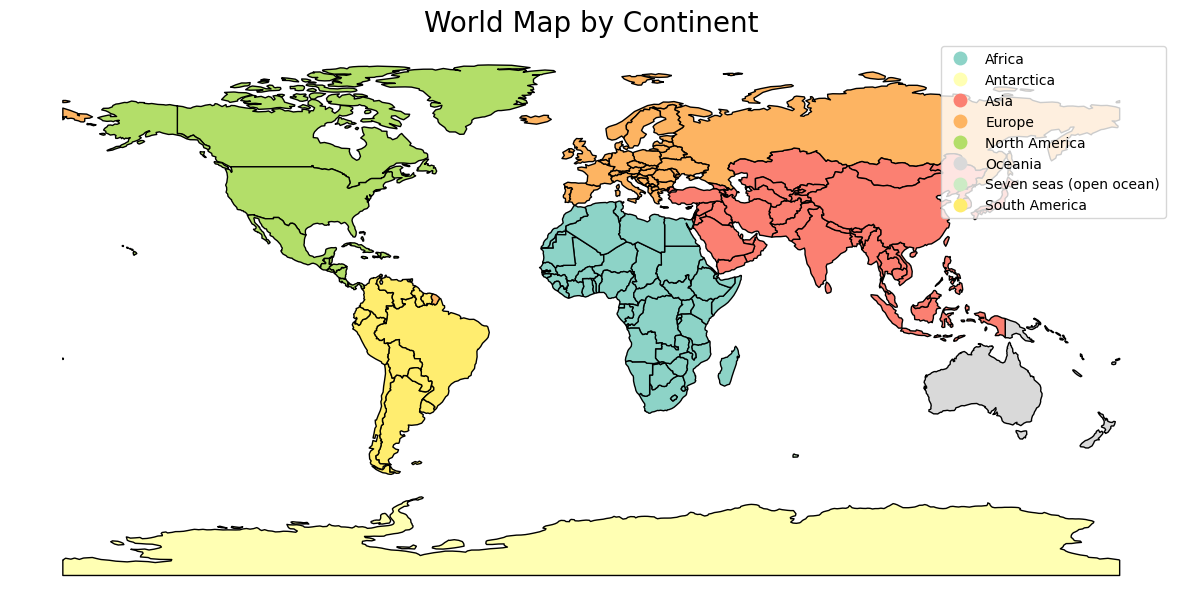

In [2]:
# Load the shapefile of world countries
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

# Check the first rows to understand the data structure
print(world.head())

# Plot the world map, coloring countries by continent
fig, ax = plt.subplots(figsize=(15, 10))  # Create a figure and axis
world.plot(
    column="CONTINENT",  # Color by the 'CONTINENT' attribute
    cmap="Set3",         # Choose a colorful map style
    legend=True,         # Show a legend
    edgecolor="black",   # Color of country borders
    ax=ax                # Plot on the axis we created
)

# Set the title
ax.set_title("World Map by Continent", fontsize=20)

# Remove the axis ticks
ax.set_axis_off()

# Show the plot
plt.show()

Let's try to analyze Italy's shapefile next.

Index(['id', 'name', 'source', 'geometry'], dtype='object')


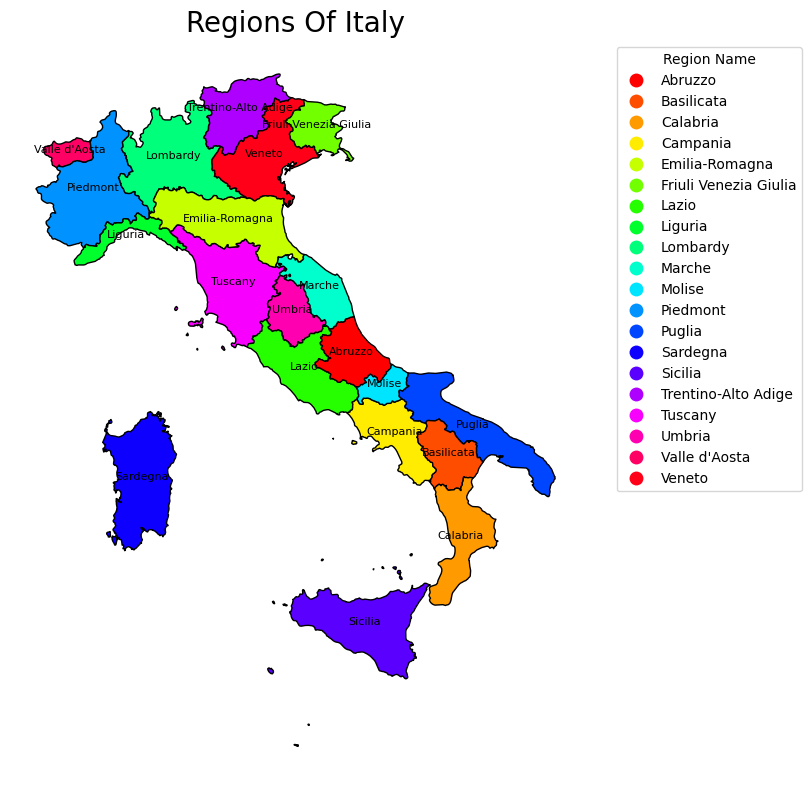

In [3]:
# Load The Shapefile Of Italian Regions
italy_area = gpd.read_file("data/italy/it.shp")

print(italy_area.columns)

# Create A Plot Figure And Axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot Regions Using Distinct Colors Based On Their Name
plot = italy_area.plot(
    column="name",         # Use Region Name For Coloring
    cmap="hsv",          # Use A Distinctive Color Map
    edgecolor="black",     # Region Borders In Black
    ax=ax,
    legend=True,           # Enable Legend
    legend_kwds={
        "bbox_to_anchor": (1.05, 1),   # Position legend outside the plot
        "loc": "upper left",           # Align it to the top-left corner outside
        "title": "Region Name",        # Legend title
    }
)

# Annotate Each Region With Its Name At The Centroid
for idx, row in italy_area.iterrows():
    if row.geometry.is_empty or row.geometry.centroid.is_empty:
        continue
    centroid = row.geometry.centroid
    ax.annotate(
        text=row["name"],
        xy=(centroid.x, centroid.y),
        ha="center",
        fontsize=8,
        color="black"
    )

# Set The Title Of The Map
ax.set_title("Regions Of Italy", fontsize=20)

# Hide Axis Ticks And Labels
ax.set_axis_off()

# Adjust Layout To Make Space For Legend
plt.tight_layout()

# Show The Final Map
plt.show()

Knowing what type of columns are in Italy's shapefile, we can make a plot showing the name of every region.